## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [50]:
#using shape to find the number of samples in training and test sets
x_train.shape[0]

60000

In [51]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [52]:
print(x_train.shape[1], x_train.shape[2])
print(x_test.shape[1], x_test.shape[2])
print(y_train.shape)
print(y_test.shape)

28 28
28 28
(60000,)
(10000,)


In [0]:
import keras
num_classes = 10

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
#for training label data
y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric

In [0]:
#for testing label data
y_test = keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [56]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])
print ('Train dtype:', x_train.dtype)
print ('Test dtype:', x_test.dtype)

Train size: 60000
Test size: 10000
Train dtype: float32
Test dtype: float32


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /= 255                           # Scale the data between 0 and 1

In [0]:
x_test /= 255   #scale the data between 0 and 1

### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
EPOCHS = 10
BATCH_SIZE = 256
PATIENCE = 5

In [65]:
    
    # Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.4476 - acc: 0.8439 - val_loss: 0.3415 - val_acc: 0.8774
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2858 - acc: 0.8957 - val_loss: 0.2990 - val_acc: 0.8934
Epoch 3/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2353 - acc: 0.9141 - val_loss: 0.2666 - val_acc: 0.9011
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1921 - acc: 0.9289 - val_loss: 0.2480 - val_acc: 0.9105
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1631 - acc: 0.9407 - val_loss: 0.2793 - val_acc: 0.9055
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1337 - acc: 0.9515 - val_loss: 0.2571 - val_acc: 0.9151
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1064 - acc: 0.9616 - val_loss: 0.2622 - val_acc

In [66]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 60us/step
[0.3126581842198968, 0.9151]


In [82]:
loss_and_metrics = model.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 62us/step
[0.03348657704073315, 0.9907]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
EPOCHS = 20
BATCH_SIZE = 256
PATIENCE = 5

In [98]:
 
    # Define Model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model2.add(Dropout(0.25))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))
    
    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.5165 - acc: 0.8182 - val_loss: 0.3725 - val_acc: 0.8677
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.3201 - acc: 0.8847 - val_loss: 0.3300 - val_acc: 0.8741
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2783 - acc: 0.8997 - val_loss: 0.2783 - val_acc: 0.8994
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2469 - acc: 0.9114 - val_loss: 0.2573 - val_acc: 0.9071
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2236 - acc: 0.9187 - val_loss: 0.2486 - val_acc: 0.9096
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2040 - acc: 0.9252 - val_loss: 0.2470 - val_acc: 0.9085
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1868 - acc: 0.9318 - val_loss: 0.2365 - val_acc

In [99]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 58us/step
[0.25204551481604576, 0.9279]


In [100]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 60us/step
[0.02877534565643097, 0.9924833333333334]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

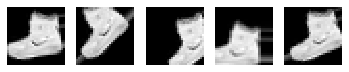

In [84]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [102]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=BATCH_SIZE),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/20
  3/234 [..............................] - ETA: 13s - loss: 4.4674 - acc: 0.3073

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=234, epochs=20)`
  after removing the cwd from sys.path.


234/234 [==============================] - 13s 56ms/step - loss: 1.0870 - acc: 0.6175 - val_loss: 0.4981 - val_acc: 0.8148
Epoch 2/20
234/234 [==============================] - 13s 54ms/step - loss: 0.7377 - acc: 0.7269 - val_loss: 0.4577 - val_acc: 0.8418
Epoch 3/20
234/234 [==============================] - 13s 55ms/step - loss: 0.6756 - acc: 0.7486 - val_loss: 0.4193 - val_acc: 0.8481
Epoch 4/20
234/234 [==============================] - 12s 53ms/step - loss: 0.6374 - acc: 0.7650 - val_loss: 0.4062 - val_acc: 0.8576
Epoch 5/20
234/234 [==============================] - 13s 53ms/step - loss: 0.6095 - acc: 0.7744 - val_loss: 0.4120 - val_acc: 0.8522
Epoch 6/20
234/234 [==============================] - 13s 55ms/step - loss: 0.5892 - acc: 0.7834 - val_loss: 0.4080 - val_acc: 0.8534
Epoch 7/20
234/234 [==============================] - 13s 56ms/step - loss: 0.5680 - acc: 0.7903 - val_loss: 0.4132 - val_acc: 0.8529
Epoch 8/20
234/234 [==============================] - 13s 56ms/step - los

###  Report the final train and validation accuracy

In [103]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 66us/step
[0.3494202681541443, 0.8792]


In [104]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 62us/step
[0.3163796895424525, 0.8829]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### **Load CIFAR10 dataset**

In [0]:
# Load/Prep the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [113]:
print("x_train shape = ", x_train.shape)
print("x_test shape = ", x_test.shape)
print("y_train shape = ", y_train.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (50000, 32, 32, 3)
x_test shape =  (10000, 32, 32, 3)
y_train shape =  (50000, 1)
y_test shape =  (10000, 1)


In [114]:
#reshape x_train and x_test data according to input image size
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')

#Normalize both the train and test image data from 0-255 to 0-1
x_train /= 255
x_test /= 255

#Convert train and test labels to one hot vectors
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

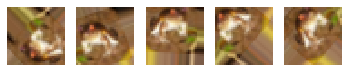

In [119]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()